In [3]:
# Normalise features
# Find the optimal parameters C (inverse regulalisation strengths)
# Find the best features to predict stock movement (up or down)
# Convert probability into absolute values (stock % increase/decrease)
# SVC, RandomForest, MinMax, LongShortTermMemory

%matplotlib inline
%pylab inline

# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell
from jupyterthemes import jtplot

#import classes
from company import Company
from onestep_baseline_company import OneStepBaselineCompany
from onestep_lstm_company import OneStepLSTMCompany
from multistep_baseline_company import MultiStepBaselineCompany
#from multistep_lstm_company import MultiStepLSTMCompany
jtplot.style(theme='grade3')
jtplot.style(theme='grade3')



Populating the interactive namespace from numpy and matplotlib


In [2]:
start_train_date = "01/01/2018"
end_train_start_test_date = "01/05/2018"
end_test_date = "01/12/2018"


date
2018-05-02    46.79
2018-05-03    45.89
2018-05-04    46.62
2018-05-07    47.58
2018-05-08    48.48
2018-05-09    48.57
2018-05-10    51.01
2018-05-11    52.66
2018-05-14    51.82
2018-05-15    53.00
2018-05-16    54.01
2018-05-17    56.50
2018-05-18    54.70
2018-05-21    53.39
2018-05-22    55.48
2018-05-23    59.03
2018-05-24    59.97
2018-05-25    61.49
2018-05-29    61.35
2018-05-30    62.62
2018-05-31    62.57
2018-06-01    57.59
2018-06-04    58.74
2018-06-05    59.10
2018-06-06    59.41
2018-06-07    59.42
2018-06-08    59.63
2018-06-11    61.39
2018-06-12    61.39
2018-06-13    60.55
              ...  
2018-10-19    41.30
2018-10-22    40.45
2018-10-23    39.76
2018-10-24    38.68
2018-10-25    35.43
2018-10-26    36.78
2018-10-29    35.40
2018-10-30    34.66
2018-10-31    36.01
2018-11-01    37.72
2018-11-02    40.12
2018-11-05    40.32
2018-11-06    39.92
2018-11-07    39.80
2018-11-08    40.93
2018-11-09    40.44
2018-11-12    39.11
2018-11-13    37.44
2018-11-14    3

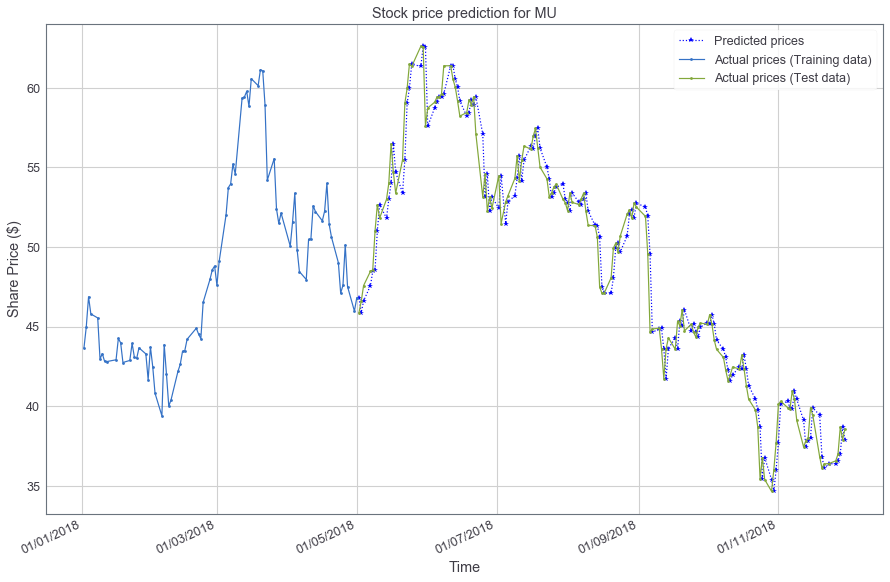

Baseline RMSE Score: 1.338 US dollar
Baseline trend Score: 0.7 %


In [3]:

company_baseline = OneStepBaselineCompany("MU", start_train_date, end_train_start_test_date, end_test_date)
company_baseline.train()
predictions = company_baseline.predict()
display(predictions)
company_baseline.plot(predictions)
rmse_score = company_baseline.score(metric="rmse", predictions=predictions)
print("Baseline RMSE Score: %.3f US dollar" % rmse_score)
trend_score = company_baseline.score(metric="trend", predictions=predictions)
print("Baseline trend Score: %.1f %%" % (trend_score*100))


In [34]:
start_train_date = "01/01/2018"
end_train_start_test_date = "01/03/2018"
end_test_date = "01/5/2018"

one_step_lstm = OneStepLSTMCompany("MU", start_train_date, end_train_start_test_date, end_test_date, 
                         n_epochs=3000, n_batch=1, n_neurons=4)
one_step_lstm.train()


size of train_raw data:  41


date
2018-01-02    43.67
2018-01-03    44.98
2018-01-04    46.88
2018-01-05    45.80
2018-01-08    45.55
2018-01-09    42.97
2018-01-10    43.31
2018-01-11    42.82
2018-01-12    42.81
2018-01-16    42.92
2018-01-17    44.26
2018-01-18    43.99
2018-01-19    42.75
2018-01-22    42.88
2018-01-23    43.95
2018-01-24    43.08
2018-01-25    43.01
2018-01-26    43.67
2018-01-29    43.29
2018-01-30    41.67
2018-01-31    43.72
2018-02-01    42.49
2018-02-02    40.82
2018-02-05    39.40
2018-02-06    43.88
2018-02-07    42.01
2018-02-08    40.00
2018-02-09    40.41
2018-02-12    42.19
2018-02-13    42.63
2018-02-14    43.45
2018-02-15    43.50
2018-02-16    44.21
2018-02-20    44.90
2018-02-21    44.54
2018-02-22    44.25
2018-02-23    46.53
2018-02-26    47.98
2018-02-27    48.58
2018-02-28    48.81
2018-03-01    47.62
Name: 5. adjusted close, dtype: float64

size of test_raw data:  42


date
2018-03-02    49.11
2018-03-05    52.03
2018-03-06    53.74
2018-03-07    53.97
2018-03-08    55.22
2018-03-09    54.59
2018-03-12    59.37
2018-03-13    59.43
2018-03-14    59.78
2018-03-15    58.84
2018-03-16    60.58
2018-03-19    60.14
2018-03-20    61.15
2018-03-21    61.07
2018-03-22    58.92
2018-03-23    54.21
2018-03-26    55.56
2018-03-27    52.40
2018-03-28    51.49
2018-03-29    52.14
2018-04-02    50.06
2018-04-03    51.55
2018-04-04    53.39
2018-04-05    49.84
2018-04-06    48.46
2018-04-09    47.96
2018-04-10    50.48
2018-04-11    50.48
2018-04-12    52.59
2018-04-13    52.23
2018-04-16    51.65
2018-04-17    52.26
2018-04-18    54.01
2018-04-19    51.42
2018-04-20    50.62
2018-04-23    49.02
2018-04-24    47.11
2018-04-25    47.60
2018-04-26    50.14
2018-04-27    47.52
2018-04-30    45.98
2018-05-01    46.79
Name: 5. adjusted close, dtype: float64

size of supervised train_scaled data:  40
[[-0.26912181  0.101983  ]
 [ 0.101983    0.26912181]
 [ 0.26912181 -0.57507082]
 [-0.57507082 -0.33994334]
 [-0.33994334 -1.        ]
 [-1.         -0.17280453]
 [-0.17280453 -0.40793201]
 [-0.40793201 -0.27195467]
 [-0.27195467 -0.23796034]
 [-0.23796034  0.11048159]
 [ 0.11048159 -0.34560907]
 [-0.34560907 -0.6203966 ]
 [-0.6203966  -0.23229462]
 [-0.23229462  0.03399433]
 [ 0.03399433 -0.51558074]
 [-0.51558074 -0.28895184]
 [-0.28895184 -0.08215297]
 [-0.08215297 -0.37677054]
 [-0.37677054 -0.72804533]
 [-0.72804533  0.31161473]
 [ 0.31161473 -0.61756374]
 [-0.61756374 -0.74220963]
 [-0.74220963 -0.6713881 ]
 [-0.6713881   1.        ]
 [ 1.         -0.79886686]
 [-0.79886686 -0.83852691]
 [-0.83852691 -0.1529745 ]
 [-0.1529745   0.23512748]
 [ 0.23512748 -0.14447592]
 [-0.14447592 -0.0368272 ]
 [-0.0368272  -0.25495751]
 [-0.25495751 -0.06798867]
 [-0.06798867 -0.07365439]
 [-0.07365439 -0.37110482]
 [-0.37110482 -0.35127479]
 [-0.35127479

X:  [-0.60623229] y:  0.5580736543909343
invert difference to  52.03
X:  [0.55807365] y:  0.21529745042492848
invert difference to  53.74
X:  [0.21529745] y:  -0.20396600566572404
invert difference to  53.97
X:  [-0.20396601] y:  0.0849858356940501
invert difference to  55.22
X:  [0.08498584] y:  -0.44759206798866796
invert difference to  54.59
X:  [-0.44759207] y:  1.0849858356940478
invert difference to  59.37
X:  [1.08498584] y:  -0.2521246458923514
invert difference to  59.43
X:  [-0.25212465] y:  -0.16997167138810237
invert difference to  59.78
X:  [-0.16997167] y:  -0.5354107648725213
invert difference to  58.84
X:  [-0.53541076] y:  0.2237960339943319
invert difference to  60.58
X:  [0.22379603] y:  -0.39376770538243633
invert difference to  60.14
X:  [-0.39376771] y:  0.016997167138808777
invert difference to  61.15
X:  [0.01699717] y:  -0.29178470254957534
invert difference to  61.07
X:  [-0.2917847] y:  -0.878186968838527
invert difference to  58.92
X:  [-0.87818697] y:  -1.6

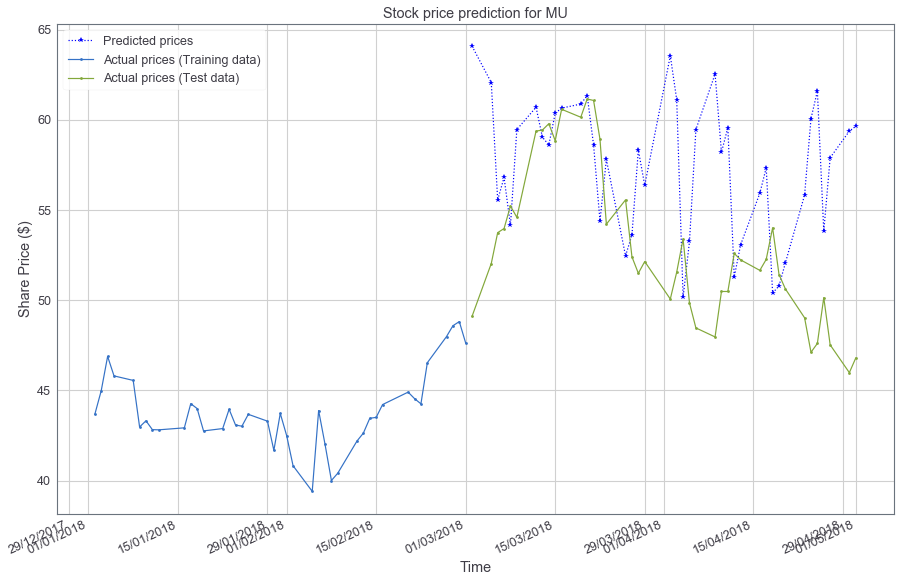

LSTM RMSE Score: 7.221 US dollar
LSTM trend Score: 52.4 %


Yesterday price:  [-0.60623229]
X:  [-0.60623229]
2018-03-02    60.411421
dtype: float64


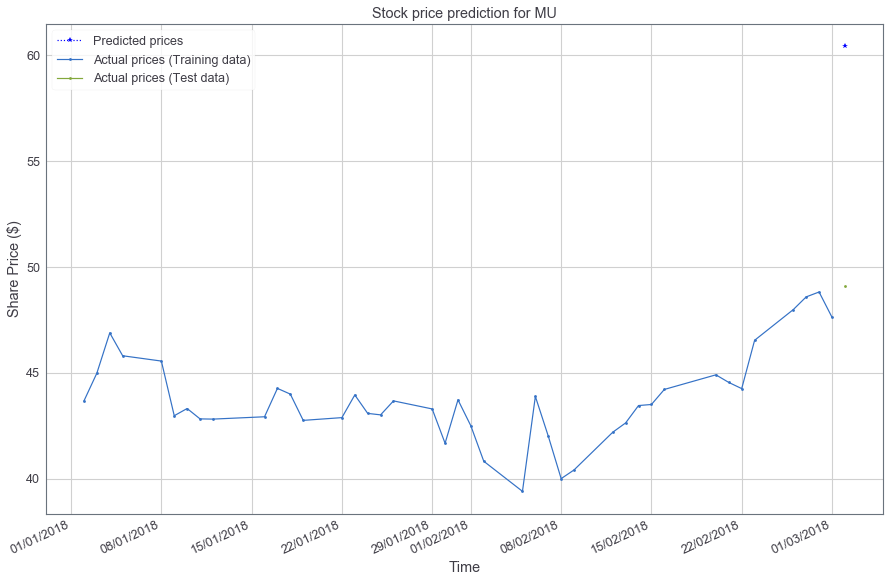

In [35]:
jtplot.style(theme='grade3')


predictions = one_step_lstm.predict()
one_step_lstm.plot(predictions)

lstm_score = one_step_lstm.score(metric="rmse", predictions=predictions)
print("LSTM RMSE Score: %.3f US dollar" % lstm_score)
trend_score = one_step_lstm.score(metric="trend", predictions=predictions)
print("LSTM trend Score: %.1f %%" % (trend_score*100))

print("\n")
one_day_pred = one_step_lstm.forecast_lstm_one_step()
one_step_lstm.plot(one_day_pred)


In [38]:
print(one_step_lstm.train_scaled)
print(type(one_step_lstm.train_scaled))

[[-0.26912181  0.101983  ]
 [ 0.101983    0.26912181]
 [ 0.26912181 -0.57507082]
 [-0.57507082 -0.33994334]
 [-0.33994334 -1.        ]
 [-1.         -0.17280453]
 [-0.17280453 -0.40793201]
 [-0.40793201 -0.27195467]
 [-0.27195467 -0.23796034]
 [-0.23796034  0.11048159]
 [ 0.11048159 -0.34560907]
 [-0.34560907 -0.6203966 ]
 [-0.6203966  -0.23229462]
 [-0.23229462  0.03399433]
 [ 0.03399433 -0.51558074]
 [-0.51558074 -0.28895184]
 [-0.28895184 -0.08215297]
 [-0.08215297 -0.37677054]
 [-0.37677054 -0.72804533]
 [-0.72804533  0.31161473]
 [ 0.31161473 -0.61756374]
 [-0.61756374 -0.74220963]
 [-0.74220963 -0.6713881 ]
 [-0.6713881   1.        ]
 [ 1.         -0.79886686]
 [-0.79886686 -0.83852691]
 [-0.83852691 -0.1529745 ]
 [-0.1529745   0.23512748]
 [ 0.23512748 -0.14447592]
 [-0.14447592 -0.0368272 ]
 [-0.0368272  -0.25495751]
 [-0.25495751 -0.06798867]
 [-0.06798867 -0.07365439]
 [-0.07365439 -0.37110482]
 [-0.37110482 -0.35127479]
 [-0.35127479  0.37677054]
 [ 0.37677054  0.14164306]
 

In [ ]:
# load dataset
start_train_date = "01/01/2018"
end_train_start_test_date = "01/05/2018"
end_test_date = "01/10/2018"

multi_step_baseline = MultiStepBaselineCompany("MU", start_train_date, end_train_start_test_date, end_test_date, 
                                               n_lag=1, n_seq=3)
predictions = multi_step_baseline.predict()
#display(predictions)
#display(multi_step_baseline.test_raw_series.values)
#display(type(multi_step_baseline.test_raw_series.values))
multi_step_baseline.plot(predictions)
multi_step_baseline.score(predictions)



In [35]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
from numpy import array
from company import Company


class MultiStepLSTMCompany(Company):
    def __init__(self, name, train_start_date_string, train_end_test_start_date_string, test_end_date_string,
                 n_lag, n_seq, n_epochs, n_batch, n_neurons):
        Company.__init__(self, name)
        self.scaler = None
        self.lstm_model = None
        self.train_raw_series = self.get_share_prices(train_start_date_string, train_end_test_start_date_string)
        self.test_raw_series = self.get_share_prices(train_end_test_start_date_string, test_end_date_string,
                                                     start_delay=1)
        self.n_lag = n_lag
        self.n_seq = n_seq
        self.n_epochs = n_epochs
        self.n_batch = n_batch
        self.n_neurons = n_neurons
        self.train_scaled, self.test_scaled = self.preprocess_data()
        
    def preprocess_data(self):
        # transform data to be stationary
        train_diff_series = self.difference(self.train_raw_series.values, "train")
        train_diff_values = train_diff_series.values
        train_diff_values = train_diff_values.reshape(len(train_diff_values), 1)
        #display(train_diff_values)
    
        test_diff_series = self.difference(self.test_raw_series.values, "test")
        test_diff_values = test_diff_series.values
        test_diff_values = test_diff_values.reshape(len(test_diff_values), 1)

        # transform the scale of the data
        scaler, train_scaled, test_scaled = self.scale(train_diff_values, test_diff_values)
        train_scaled = train_scaled.reshape(len(train_scaled), 1)
        test_scaled = test_scaled.reshape(len(test_scaled), 1)
        self.scaler = scaler
        
        #display(train_scaled)
        # transform data to be supervised learning
        train_supervised_pd = self.timeseries_to_supervised(train_scaled, self.n_lag, self.n_seq)
        #display(train_supervised_pd)
        train = train_supervised_pd.values

        # removes first row because it is not relevant
        test_supervised_pd = self.timeseries_to_supervised(test_scaled, self.n_lag, self.n_seq).iloc[1:]
        test = test_supervised_pd.values
        #display(train)
        return train, test

    # create a differenced series
    def difference(self, series, source):
        diff = list()
        # First item is special case because we use the difference of the last training pair to predict the first test price
        if source == "test":
            diff.append(self.train_raw_series.values[-1] - self.train_raw_series.values[-2])

        for i in range(1, len(series)):
            value = series[i] - series[i - 1]
            diff.append(value)

        # Last item is special case because there is no next value thus the diff is
        # 1 size shorter than the original test_raw. We fix this by adding an additional item
        if source == "test":
            diff.append(0)  # placeholder for the last prediction, not used in anyway

        return pd.Series(diff)

    # convert time series into supervised learning problem
    def timeseries_to_supervised(self, data, n_in=1, n_out=1, dropnan=True):
        n_vars = 1 if type(data) is list else data.shape[1]
        df = pd.DataFrame(data)
        cols, names = list(), list()
        # input sequence (t-n, ... t-1)
        for i in range(n_in, 0, -1):
            cols.append(df.shift(i))
            names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]
        # forecast sequence (t, t+1, ... t+n)
        for i in range(0, n_out):
            cols.append(df.shift(-i))
            if i == 0:
                names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
            else:
                names += [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]
        # put it all together
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        # drop rows with NaN values
        if dropnan:
            agg.dropna(inplace=True)
        return agg

    # scale train and test data to [-1, 1]
    def scale(self, train, test):
        # fit scaler
        scaler = MinMaxScaler(feature_range=(-1, 1))
        scaler = scaler.fit(train)
        # transform train
        train = train.reshape(train.shape[0], train.shape[1])
        train_scaled = scaler.transform(train)
        # transform test
        test = test.reshape(test.shape[0], test.shape[1])
        test_scaled = scaler.transform(test)
        return scaler, train_scaled, test_scaled
    
    # fit the model
    def train(self):
        print("Fitting the model")

        self.lstm_model = self.fit_lstm(self.train_scaled)
        # forecast the entire training dataset to build up state for forecasting
        train_reshaped = self.train_scaled[:, 0].reshape(len(self.train_scaled), 1, 1)
        self.lstm_model.predict(train_reshaped, batch_size=self.n_batch)
        print("Finished fitting the model")

    # fit an LSTM network to training data
    def fit_lstm(self, train):
        # reshape training into [samples, timesteps, features]
        X, y = train[:, 0:self.n_lag], train[:, self.n_lag:]
        X = X.reshape(X.shape[0], 1, X.shape[1])
        # design network
        model = Sequential()
        model.add(LSTM(self.n_neurons, batch_input_shape=(self.n_batch, X.shape[1], X.shape[2]), stateful=True))
        model.add(Dense(y.shape[1]))
        model.compile(loss='mean_squared_error', optimizer='adam')
        # fit network
        for i in range(self.n_epochs):
            model.fit(X, y, epochs=1, batch_size=self.n_batch, verbose=0, shuffle=False)
            model.reset_states()
        return model

    # make one forecast with an LSTM,
    def forecast_lstm(self, X):
        # reshape input pattern to [samples, timesteps, features]
        X = X.reshape(1, 1, len(X))
        # make forecast
        forecast = self.lstm_model.predict(X, batch_size=self.n_batch)
        # convert to array
        return [x for x in forecast[0, :]]

    # invert differenced forecast
    def inverse_difference(self, last_ob, forecast):
        # invert first forecast
        inverted = list()
        inverted.append(forecast[0] + last_ob)
        # propagate difference forecast using inverted first value
        for i in range(1, len(forecast)):
            inverted.append(forecast[i] + inverted[i - 1])
        return inverted

    # plot function for children classes, if run by parent, error would happen
    def plot(self, predictions):
        # line plot of observed vs predicted
        formatter = matplotlib.dates.DateFormatter('%d/%m/%Y')
        #display(predictions.index)
        for test_date in predictions.index:
            # n_seq consecutive days
            x_axis = list()
            # The first day of test
            x_axis.append(test_date)
            for j in range(self.n_seq - 1):  # first one already added
                x_axis.append(self.date_by_adding_business_days(from_date=x_axis[-1], add_days=1))
            plt.plot(x_axis, predictions[test_date], ':', marker='*', color="blue", label="Predicted prices")

        plt.plot(self.train_raw_series.index, self.train_raw_series.values,
                 '-', marker=".", label="Actual prices (Training data)")

        # test data not always possible
        try:
            plt.plot(self.test_raw_series.index,
                     self.test_raw_series.values,
                     '-', marker=".", label="Actual prices (Test data)")
        except:
            # don't plot test data if not available
            print("Exception entered")
            pass
        # remove repeated legends
        handles, labels = plt.gca().get_legend_handles_labels()
        i = 1
        while i < len(labels):
            if labels[i] in labels[:i]:
                del (labels[i])
                del (handles[i])
            else:
                i += 1
        plt.legend(handles, labels)
        ax = plt.gcf().axes[0]
        ax.xaxis.set_major_formatter(formatter)
        plt.gcf().autofmt_xdate(rotation=25)
        plt.gcf().set_size_inches(15, 10)
        plt.xlabel("Time")
        plt.ylabel("Share Price ($)")
        plt.title("Stock price prediction for " + self.name)
        plt.show()

    # invert differenced forecast
    def inverse_difference(self, last_ob, forecast):
        # invert first forecast
        inverted = list()
        inverted.append(forecast[0] + last_ob)
        # propagate difference forecast using inverted first value
        for i in range(1, len(forecast)):
            inverted.append(forecast[i] + inverted[i-1])
        return inverted

    # inverse data transform on forecasts
    def inverse_transform(self, series, predictions, n_test):
        # walk-forward validation on the test data
        inverted_predictions = pd.Series()
        pred_index = predictions.index
        for i in range(len(predictions)):
            # create array from forecast
            pred = array(predictions[i])
            pred = pred.reshape(1, len(pred))
            # invert scaling
            inv_scale = self.scaler.inverse_transform(pred)
            inv_scale = inv_scale[0, :]
            # invert differencing
            index = len(series) - n_test + i - 1
            last_ob = series.values[index]
            inv_diff = self.inverse_difference(last_ob, inv_scale)
            # store
            inverted_predictions.at[pred_index[i]] = inv_diff
        return inverted_predictions
    
    # make a one-step forecast standalone
    def forecast_lstm_one_step(self):
        predictions = pd.Series()
        train_index = self.train_raw_series.index
        
        X = np.array([self.train_scaled[len(self.train_scaled) - 1, -1]])
        print("X: ", X, "y: ?")
            
        pred = self.forecast_lstm(X)
        # store forecast
        predictions.at[self.date_by_adding_business_days(train_index[-1], 1)] = pred
        
        #print("Predictions before inverse transform")
        # inverse transform
        predictions = self.inverse_transform(self.train_raw_series, predictions, len(self.train_raw_series)+2)
        return predictions
    
    # evaluate the persistence model
    def predict(self):
        # walk-forward validation on the test data
        predictions = pd.Series()
        # Index is datetime
        test_index = self.test_raw_series.index
        for i in range(len(self.test_scaled)):
            # make multi-step forecast
            X, y = self.test_scaled[i, 0:self.n_lag], self.test_scaled[i, self.n_lag:]
            print("X: ", X, "y: ", y)
            pred = self.forecast_lstm(X)
            # store forecast
            predictions.at[test_index[i]] = pred
        
        # inverse transform
        predictions = self.inverse_transform(self.train_raw_series.append(self.test_raw_series), predictions, len(self.test_raw_series)+2)
        #print("Predictions after inverse transform")
        #display(predictions)
        return predictions
    
    # evaluate the RMSE for each forecast time step
    def score(self, metric, predictions):
        # convert actual tests and predictions to an appropriate list or arrays
        # construct list of rows
        # first item is test data for the next days, hence not taken into account to measure the prediction
        test_values = multi_step_lstm.test_raw_series.values[1:]
        actual = list()
        for i in range(len(test_values)-2):
            next_days_values = test_values[i + self.n_lag - 1: i + self.n_seq]
            actual.append(next_days_values)
        actual = np.array(actual)
        display("actual", actual)
        
        predictions = np.array(predictions.tolist())
        display("predicted", predictions)

        
        if metric == "rmse":
            rmses = list()
            for i in range(self.n_seq):
                # first one is the test data and the next n_seq are predictions
                rmse = math.sqrt(mean_squared_error(actual[:,i], predictions[:,i]))
                print('t+%d RMSE: %f' % ((i + 1), rmse))
                rmses.append(rmse)
                
            return rmses


In [24]:
X = np.array([multi_step_lstm.test_scaled[len(multi_step_lstm.test_scaled) - 1, -1]])
print(X)

[0.15178571]


In [38]:
start_train_date = "01/01/2018"
end_train_start_test_date = "10/05/2018"
end_test_date = "20/10/2018"

multi_step_lstm = MultiStepLSTMCompany("MU", start_train_date, end_train_start_test_date, end_test_date, 
                         n_lag=1, n_seq=3, n_epochs=3000, n_batch=1, n_neurons=4)

multi_step_lstm.train()


Fitting the model
Finished fitting the model


array([[ 0.2687039 ,  0.39304531, -0.23498419, -0.06006322],
       [ 0.39304531, -0.23498419, -0.06006322, -0.55110643],
       [-0.23498419, -0.06006322, -0.55110643,  0.06427819],
       [-0.06006322, -0.55110643,  0.06427819, -0.11064278],
       [-0.55110643,  0.06427819, -0.11064278, -0.00948367],
       [ 0.06427819, -0.11064278, -0.00948367,  0.01580611],
       [-0.11064278, -0.00948367,  0.01580611,  0.27502634],
       [-0.00948367,  0.01580611,  0.27502634, -0.06427819],
       [ 0.01580611,  0.27502634, -0.06427819, -0.2687039 ],
       [ 0.27502634, -0.06427819, -0.2687039 ,  0.02002107],
       [-0.06427819, -0.2687039 ,  0.02002107,  0.21812434],
       [-0.2687039 ,  0.02002107,  0.21812434, -0.19072708],
       [ 0.02002107,  0.21812434, -0.19072708, -0.02212856],
       [ 0.21812434, -0.19072708, -0.02212856,  0.1317176 ],
       [-0.19072708, -0.02212856,  0.1317176 , -0.08746048],
       [-0.02212856,  0.1317176 , -0.08746048, -0.3487882 ],
       [ 0.1317176 , -0.

date
2018-01-02    43.67
2018-01-03    44.98
2018-01-04    46.88
2018-01-05    45.80
2018-01-08    45.55
2018-01-09    42.97
2018-01-10    43.31
2018-01-11    42.82
2018-01-12    42.81
2018-01-16    42.92
2018-01-17    44.26
2018-01-18    43.99
2018-01-19    42.75
2018-01-22    42.88
2018-01-23    43.95
2018-01-24    43.08
2018-01-25    43.01
2018-01-26    43.67
2018-01-29    43.29
2018-01-30    41.67
2018-01-31    43.72
2018-02-01    42.49
2018-02-02    40.82
2018-02-05    39.40
2018-02-06    43.88
2018-02-07    42.01
2018-02-08    40.00
2018-02-09    40.41
2018-02-12    42.19
2018-02-13    42.63
              ...  
2018-03-29    52.14
2018-04-02    50.06
2018-04-03    51.55
2018-04-04    53.39
2018-04-05    49.84
2018-04-06    48.46
2018-04-09    47.96
2018-04-10    50.48
2018-04-11    50.48
2018-04-12    52.59
2018-04-13    52.23
2018-04-16    51.65
2018-04-17    52.26
2018-04-18    54.01
2018-04-19    51.42
2018-04-20    50.62
2018-04-23    49.02
2018-04-24    47.11
2018-04-25    4

array([[ 2.41306639e-01,  2.05479452e-01,  5.17386723e-01,
        -3.86722866e-01],
       [ 2.05479452e-01,  5.17386723e-01, -3.86722866e-01,
        -2.83456270e-01],
       [ 5.17386723e-01, -3.86722866e-01, -2.83456270e-01,
         4.33087460e-01],
       [-3.86722866e-01, -2.83456270e-01,  4.33087460e-01,
         7.40779768e-01],
       [-2.83456270e-01,  4.33087460e-01,  7.40779768e-01,
         1.90727081e-01],
       [ 4.33087460e-01,  7.40779768e-01,  1.90727081e-01,
         3.12961012e-01],
       [ 7.40779768e-01,  1.90727081e-01,  3.12961012e-01,
        -3.68809273e-02],
       [ 1.90727081e-01,  3.12961012e-01, -3.68809273e-02,
         2.60273973e-01],
       [ 3.12961012e-01, -3.68809273e-02,  2.60273973e-01,
        -1.79135933e-02],
       [-3.68809273e-02,  2.60273973e-01, -1.79135933e-02,
        -1.05690200e+00],
       [ 2.60273973e-01, -1.79135933e-02, -1.05690200e+00,
         2.34984194e-01],
       [-1.79135933e-02, -1.05690200e+00,  2.34984194e-01,
      

date
2018-05-11    51.82
2018-05-14    53.00
2018-05-15    54.01
2018-05-16    56.50
2018-05-17    54.70
2018-05-18    53.39
2018-05-21    55.48
2018-05-22    59.03
2018-05-23    59.97
2018-05-24    61.49
2018-05-25    61.35
2018-05-29    62.62
2018-05-30    62.57
2018-05-31    57.59
2018-06-01    58.74
2018-06-04    59.10
2018-06-05    59.41
2018-06-06    59.42
2018-06-07    59.63
2018-06-08    61.39
2018-06-11    61.39
2018-06-12    60.55
2018-06-13    60.05
2018-06-14    59.18
2018-06-15    58.23
2018-06-18    58.45
2018-06-19    59.25
2018-06-20    58.95
2018-06-21    59.44
2018-06-22    57.10
              ...  
2018-09-10    44.90
2018-09-11    43.60
2018-09-12    41.74
2018-09-13    43.62
2018-09-14    44.30
2018-09-17    43.58
2018-09-18    45.33
2018-09-19    45.06
2018-09-20    46.06
2018-09-21    44.74
2018-09-24    45.16
2018-09-25    44.64
2018-09-26    44.35
2018-09-27    44.99
2018-09-28    45.23
2018-10-01    45.15
2018-10-02    45.76
2018-10-03    45.15
2018-10-04    4

X:  [0.24130664] y:  [ 0.20547945  0.51738672 -0.38672287]
X:  [0.20547945] y:  [ 0.51738672 -0.38672287 -0.28345627]
X:  [0.51738672] y:  [-0.38672287 -0.28345627  0.43308746]
X:  [-0.38672287] y:  [-0.28345627  0.43308746  0.74077977]
X:  [-0.28345627] y:  [0.43308746 0.74077977 0.19072708]
X:  [0.43308746] y:  [0.74077977 0.19072708 0.31296101]
X:  [0.74077977] y:  [ 0.19072708  0.31296101 -0.03688093]
X:  [0.19072708] y:  [ 0.31296101 -0.03688093  0.26027397]
X:  [0.31296101] y:  [-0.03688093  0.26027397 -0.01791359]
X:  [-0.03688093] y:  [ 0.26027397 -0.01791359 -1.056902  ]
X:  [0.26027397] y:  [-0.01791359 -1.056902    0.23498419]
X:  [-0.01791359] y:  [-1.056902    0.23498419  0.06849315]
X:  [-1.056902] y:  [0.23498419 0.06849315 0.05795574]
X:  [0.23498419] y:  [ 0.06849315  0.05795574 -0.0052687 ]
X:  [0.06849315] y:  [ 0.05795574 -0.0052687   0.03688093]
X:  [0.05795574] y:  [-0.0052687   0.03688093  0.36354057]
X:  [-0.0052687] y:  [ 0.03688093  0.36354057 -0.00737619]
X: 

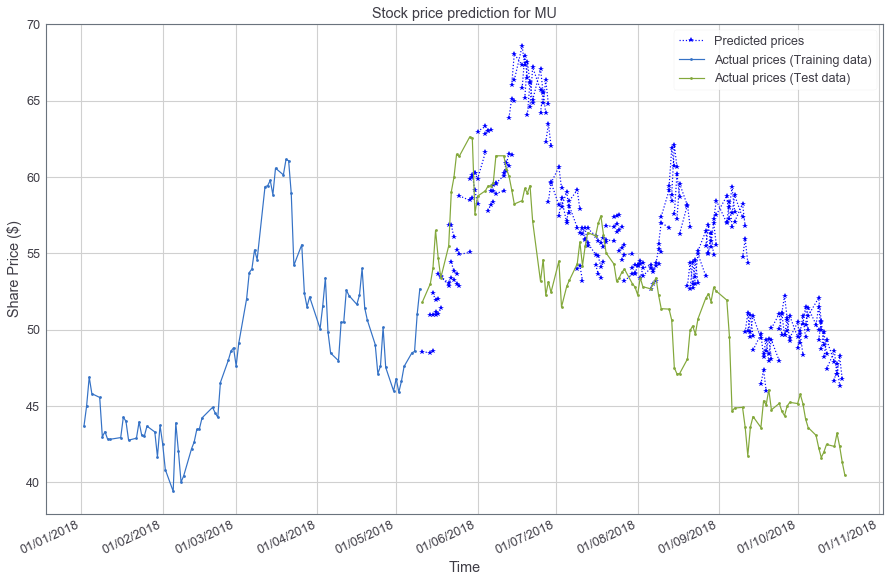

X:  [0.34035827] y: ?


'next days predictions'

2018-05-11    [53.43430644989014, 54.43395025253296, 53.0508...
dtype: object

'actual'

array([[53.  , 54.01, 56.5 ],
       [54.01, 56.5 , 54.7 ],
       [56.5 , 54.7 , 53.39],
       [54.7 , 53.39, 55.48],
       [53.39, 55.48, 59.03],
       [55.48, 59.03, 59.97],
       [59.03, 59.97, 61.49],
       [59.97, 61.49, 61.35],
       [61.49, 61.35, 62.62],
       [61.35, 62.62, 62.57],
       [62.62, 62.57, 57.59],
       [62.57, 57.59, 58.74],
       [57.59, 58.74, 59.1 ],
       [58.74, 59.1 , 59.41],
       [59.1 , 59.41, 59.42],
       [59.41, 59.42, 59.63],
       [59.42, 59.63, 61.39],
       [59.63, 61.39, 61.39],
       [61.39, 61.39, 60.55],
       [61.39, 60.55, 60.05],
       [60.55, 60.05, 59.18],
       [60.05, 59.18, 58.23],
       [59.18, 58.23, 58.45],
       [58.23, 58.45, 59.25],
       [58.45, 59.25, 58.95],
       [59.25, 58.95, 59.44],
       [58.95, 59.44, 57.1 ],
       [59.44, 57.1 , 53.16],
       [57.1 , 53.16, 54.59],
       [53.16, 54.59, 52.26],
       [54.59, 52.26, 53.14],
       [52.26, 53.14, 52.44],
       [53.14, 52.44, 54.48],
       [52

'predicted'

array([[48.5448347 , 48.47956672, 48.62538495],
       [50.97251072, 50.96572099, 51.17060378],
       [52.39793676, 51.911376  , 52.0053953 ],
       [50.97327555, 51.00251747, 51.39287809],
       [53.61499602, 53.48187827, 53.04174273],
       [53.47856672, 52.8869033 , 53.3932413 ],
       [56.85055861, 56.86187318, 56.03810492],
       [54.39930249, 53.83480896, 53.63790385],
       [53.22979203, 53.01309724, 52.84308439],
       [55.20831565, 54.92350868, 55.05818422],
       [58.77449143, 58.4670698 , 58.60236825],
       [59.89644061, 60.00620826, 60.27454983],
       [60.11895691, 59.1296578 , 58.21247243],
       [60.26304922, 59.86573324, 61.62230906],
       [62.98144349, 63.31609773, 63.0200037 ],
       [62.81976096, 63.02483458, 63.08483184],
       [57.7910321 , 58.16591435, 58.37539784],
       [59.11224978, 59.48044725, 59.53604165],
       [59.06687568, 58.91665995, 59.09356932],
       [59.59589519, 60.0778331 , 60.37572839],
       [60.24156116, 60.93412117, 60.706

t+1 RMSE: 5.566355
t+2 RMSE: 6.921926
t+3 RMSE: 6.306568


TypeError: a float is required

In [39]:
display(multi_step_lstm.train_scaled)
display(multi_step_lstm.train_raw_series)
display(multi_step_lstm.test_scaled)
display(multi_step_lstm.test_raw_series)

predictions = multi_step_lstm.predict()
multi_step_lstm.plot(predictions)
display("next days predictions", multi_step_lstm.forecast_lstm_one_step())

lstm_score = multi_step_lstm.score(metric="rmse", predictions=predictions)
print("LSTM RMSE Score: %.3f US dollar" % lstm_score)
trend_score = multi_step_lstm.score(metric="trend", predictions=predictions)
print("LSTM trend Score: %.1f %%" % (trend_score*100))

array([[ 0.2687039 ],
       [ 0.39304531],
       [-0.23498419],
       [-0.06006322],
       [-0.55110643],
       [ 0.06427819],
       [-0.11064278],
       [-0.00948367],
       [ 0.01580611],
       [ 0.27502634],
       [-0.06427819],
       [-0.2687039 ],
       [ 0.02002107],
       [ 0.21812434],
       [-0.19072708],
       [-0.02212856],
       [ 0.1317176 ],
       [-0.08746048],
       [-0.3487882 ],
       [ 0.42465753],
       [-0.26659642],
       [-0.35932561],
       [-0.30663857],
       [ 0.93677555],
       [-0.40147524],
       [-0.43097998],
       [ 0.07903056],
       [ 0.36775553],
       [ 0.085353  ],
       [ 0.1654373 ],
       [ 0.00316122],
       [ 0.14225501],
       [ 0.13804004],
       [-0.08324552],
       [-0.06849315],
       [ 0.47312961],
       [ 0.29820864],
       [ 0.11907271],
       [ 0.04109589],
       [-0.25816649],
       [ 0.30663857],
       [ 0.60800843],
       [ 0.35300316],
       [ 0.04109589],
       [ 0.25605901],
       [-0

<class 'numpy.ndarray'>


,var1(t-1),var1(t),var1(t+1),var1(t+2)
1,0.268704,0.393045,-0.234984,-0.060063
2,0.393045,-0.234984,-0.060063,-0.551106
3,-0.234984,-0.060063,-0.551106,0.064278
4,-0.060063,-0.551106,0.064278,-0.110643
5,-0.551106,0.064278,-0.110643,-0.009484
6,0.064278,-0.110643,-0.009484,0.015806
7,-0.110643,-0.009484,0.015806,0.275026
8,-0.009484,0.015806,0.275026,-0.064278
9,0.015806,0.275026,-0.064278,-0.268704
10,0.275026,-0.064278,-0.268704,0.020021


[[0.023122244, 0.022444546, 0.019622866],
 [0.04080543, 0.054989725, 0.03425229],
 [0.017840102, 0.012722999, 0.015252918],
 [-0.006834343, -0.03268931, -0.0051604286],
 [0.022926465, 0.022084221, 0.019460894],
 [0.0346315, 0.04362686, 0.029144552],
 [0.048927635, 0.06993832, 0.04097185],
 [0.04231412, 0.057766423, 0.03550044],
 [0.015453406, 0.008330375, 0.013278384],
 [-0.026827263, -0.069485456, -0.02170071]]

'test'

array([[-0.08324552, -0.12961012,  0.12118019,  0.36143309],
       [-0.12961012,  0.12118019,  0.36143309, -0.55321391],
       [ 0.12118019,  0.36143309, -0.55321391, -0.17597471],
       [ 0.36143309, -0.55321391, -0.17597471, -0.34457323],
       [-0.55321391, -0.17597471, -0.34457323, -0.40990516],
       [-0.17597471, -0.34457323, -0.40990516,  0.09589041],
       [-0.34457323, -0.40990516,  0.09589041,  0.52792413],
       [-0.40990516,  0.09589041,  0.52792413, -0.55953635],
       [ 0.09589041,  0.52792413, -0.55953635, -0.33192835],
       [ 0.52792413, -0.55953635, -0.33192835,  0.16332982]])

t+1 RMSE: 1.768768
t+2 RMSE: 2.505407
t+3 RMSE: 2.795322


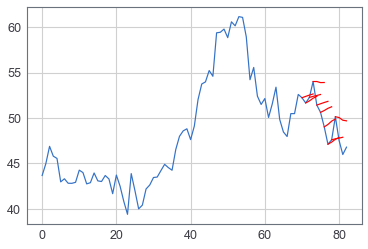

In [108]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
from numpy import array

 
# convert time series into supervised learning problem
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	display(data)
	print(type(data))
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
 
# transform series into train and test sets for supervised learning
def prepare_data(series, n_test, n_lag, n_seq):
	# extract raw values
	raw_values = series.values
	# transform data to be stationary
	diff_series = difference(raw_values, 1)
	diff_values = diff_series.values
	diff_values = diff_values.reshape(len(diff_values), 1)
	# rescale values to -1, 1
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaled_values = scaler.fit_transform(diff_values)
	scaled_values = scaled_values.reshape(len(scaled_values), 1)
	# transform into supervised learning problem X, y
	supervised = series_to_supervised(scaled_values, n_lag, n_seq)
	display(supervised)
	supervised_values = supervised.values
	# split into train and test sets
	train, test = supervised_values[0:-n_test], supervised_values[-n_test:]
	return scaler, train, test
 
# fit an LSTM network to training data
def fit_lstm(train, n_lag, n_seq, n_batch, nb_epoch, n_neurons):
	# reshape training into [samples, timesteps, features]
	X, y = train[:, 0:n_lag], train[:, n_lag:]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	# design network
	model = Sequential()
	model.add(LSTM(n_neurons, batch_input_shape=(n_batch, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(y.shape[1]))
	model.compile(loss='mean_squared_error', optimizer='adam')
	# fit network
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=n_batch, verbose=0, shuffle=False)
		model.reset_states()
	return model
 
# make one forecast with an LSTM,
def forecast_lstm(model, X, n_batch):
	# reshape input pattern to [samples, timesteps, features]
	X = X.reshape(1, 1, len(X))
	# make forecast
	forecast = model.predict(X, batch_size=n_batch)
	# convert to array
	return [x for x in forecast[0, :]]
 
# evaluate the persistence model
def make_forecasts(model, n_batch, train, test, n_lag, n_seq):
	forecasts = list()
	for i in range(len(test)):
		X, y = test[i, 0:n_lag], test[i, n_lag:]
		# make forecast
		forecast = forecast_lstm(model, X, n_batch)
		# store the forecast
		forecasts.append(forecast)
	return forecasts
 
# invert differenced forecast
def inverse_difference(last_ob, forecast):
	# invert first forecast
	inverted = list()
	inverted.append(forecast[0] + last_ob)
	# propagate difference forecast using inverted first value
	for i in range(1, len(forecast)):
		inverted.append(forecast[i] + inverted[i-1])
	return inverted
 
# inverse data transform on forecasts
def inverse_transform(series, forecasts, scaler, n_test):
	inverted = list()
	for i in range(len(forecasts)):
		# create array from forecast
		forecast = array(forecasts[i])
		forecast = forecast.reshape(1, len(forecast))
		# invert scaling
		inv_scale = scaler.inverse_transform(forecast)
		inv_scale = inv_scale[0, :]
		# invert differencing
		index = len(series) - n_test + i - 1
		last_ob = series.values[index]
		inv_diff = inverse_difference(last_ob, inv_scale)
		# store
		inverted.append(inv_diff)
	return inverted
 
# evaluate the RMSE for each forecast time step
def evaluate_forecasts(test, forecasts, n_lag, n_seq):
	for i in range(n_seq):
		actual = [row[i] for row in test]
		predicted = [forecast[i] for forecast in forecasts]
		rmse = sqrt(mean_squared_error(actual, predicted))
		print('t+%d RMSE: %f' % ((i+1), rmse))

# plot the forecasts in the context of the original dataset
def plot_forecasts(series, forecasts, n_test):
	# plot the entire dataset in blue
	pyplot.plot(series.values)
	# plot the forecasts in red
	for i in range(len(forecasts)):
		off_s = len(series) - n_test + i - 1
		off_e = off_s + len(forecasts[i]) + 1
		xaxis = [x for x in range(off_s, off_e)]
		yaxis = [series.values[off_s]] + forecasts[i]
		pyplot.plot(xaxis, yaxis, color='red')
	# show the plot
	pyplot.show()

# load dataset
series = company_baseline.train_raw_series
# configure
n_lag = 1
n_seq = 3
n_test = 10
n_epochs = 1500
n_batch = 1
n_neurons = 1
# prepare data
scaler, train, test = prepare_data(series, n_test, n_lag, n_seq)
# fit model
model = fit_lstm(train, n_lag, n_seq, n_batch, n_epochs, n_neurons)
# make forecasts
forecasts = make_forecasts(model, n_batch, train, test, n_lag, n_seq)
display(forecasts)
# inverse transform forecasts and test
forecasts = inverse_transform(series, forecasts, scaler, n_test+2)
display("test", test)
actual = [row[n_lag:] for row in test]
actual = inverse_transform(series, actual, scaler, n_test+2)
# evaluate forecasts
evaluate_forecasts(actual, forecasts, n_lag, n_seq)
# plot forecasts
plot_forecasts(series, forecasts, n_test+2)

In [144]:
display(test)
display(multi_step_lstm.test_raw_series.values)
values = multi_step_lstm.test_raw_series.values
actual =list()
for i in range(len(values)-2):
    x = [values[i], values[i+1], values[i+2]]
    actual.append(x)

actual = np.array(actual)
display(actual)
display(actual[:,0])

array([[-0.08324552, -0.12961012,  0.12118019,  0.36143309],
       [-0.12961012,  0.12118019,  0.36143309, -0.55321391],
       [ 0.12118019,  0.36143309, -0.55321391, -0.17597471],
       [ 0.36143309, -0.55321391, -0.17597471, -0.34457323],
       [-0.55321391, -0.17597471, -0.34457323, -0.40990516],
       [-0.17597471, -0.34457323, -0.40990516,  0.09589041],
       [-0.34457323, -0.40990516,  0.09589041,  0.52792413],
       [-0.40990516,  0.09589041,  0.52792413, -0.55953635],
       [ 0.09589041,  0.52792413, -0.55953635, -0.33192835],
       [ 0.52792413, -0.55953635, -0.33192835,  0.16332982]])

array([42.82, 42.81, 42.92, 44.26, 43.99, 42.75, 42.88, 43.95, 43.08,
       43.01, 43.67, 43.29, 41.67, 43.72, 42.49])

array([[42.82, 42.81, 42.92],
       [42.81, 42.92, 44.26],
       [42.92, 44.26, 43.99],
       [44.26, 43.99, 42.75],
       [43.99, 42.75, 42.88],
       [42.75, 42.88, 43.95],
       [42.88, 43.95, 43.08],
       [43.95, 43.08, 43.01],
       [43.08, 43.01, 43.67],
       [43.01, 43.67, 43.29],
       [43.67, 43.29, 41.67],
       [43.29, 41.67, 43.72],
       [41.67, 43.72, 42.49]])

array([42.82, 42.81, 42.92, 44.26, 43.99, 42.75, 42.88, 43.95, 43.08,
       43.01, 43.67, 43.29, 41.67])